In [3]:
import pandas as pd
from bs4  import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px

# Restaurants

In [4]:
resto_soup = pd.read_csv('restaurant_soup').drop(columns='Unnamed: 0').squeeze()
resto_soup2 = pd.read_csv('restaurant_soup2.csv').drop(columns='Unnamed: 0').squeeze()

In [5]:
resto_soup2.index

Index(['Cerveseria Catalana', 'My Fucking Restaurant', 'Ciutat Comtal',
       'Tapeo', 'Arume', 'Taquerías Tamarindo', 'Vinitus', 'Somorrostro',
       'Cañete', 'Firebug',
       ...
       'Chez Cocó', 'Portolés', 'Bo de Gracia', 'Margherita', 'Bar Nolla',
       'Casa Dorita', 'Palmito Beach Bar', 'Takumi Sapporo Ramen Kitchen',
       'Bosque Palermo', 'Son Hao'],
      dtype='object', length=207)

In [6]:
resto_soup.index


Index(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110',
       '120', '130', '140', '150', '160', '170', '180', '190', '200', '210',
       '220', '230'],
      dtype='object')

In [7]:
# restaurant name
r_name = []
for row in resto_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        r_name.append(tag.text)

In [8]:
# It's like there are duplicates
pd.Series(r_name).value_counts()

La Paradeta                    5
Estimar                        2
Els Sortidors del Parlament    2
Eden                           2
Federal                        2
                              ..
Las Sorrentinas                1
Luigi                          1
Chen Ji                        1
El Quim de la Boqueria         1
Son Hao                        1
Length: 207, dtype: int64

In [9]:
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

        # print(   pd.Series(header_text).str.extract(r'(€+)').squeeze()   )
        # print('-'*100)
    

In [10]:
# ratings = []
# for row in resto_soup:
#     soup = BeautifulSoup(row, 'html.parser')
#     result = soup.find_all(class_ = container_class)
#     for tag in result:
#         header_text = tag.div.div.div.nextSibling.div.div.div.nextSibling.div.div.div.span.div
#         rating = header_text.select('aria_label')
#         for r in rating:
#             print(r.find_next_sibling.text())
#         # if rating is not None:
#         #     ratings.append(rating)
#         # else:
#         #     rating.append(np.nan)

# rating

In [11]:
review_count = []

for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        reviews = header_text.select_one('.css-chan6m')
        if reviews is not None:
            review_count.append(reviews.text)
        else:
            review_count.append(np.nan)

review_count = [int(toint) for toint in review_count]


In [12]:
category_list = []

for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        category = header_text.select_one('.css-dd1rsv')
        if category is not None:
            category_list.append(category.text)
        else:
            category_list.append(np.nan)



In [13]:
neighbourhood_list = []
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        neighbourhood = header_text.select_one('.css-dzq7l1 .css-chan6m')
        if neighbourhood is not None:
            neighbourhood_list.append(neighbourhood.text)
        else:
            neighbourhood_list.append(np.nan)


In [14]:
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in resto_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')
        
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])

        else:
            rating.append(np.nan)

rating = [float(toint) for toint in rating]



In [56]:

location = [] 
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '::'.join(adress_elements) )


In [57]:
location_resto_df = pd.DataFrame({'name': resto_soup2.index, 'location': location})
# for n, loc in zip(hotel_soup2.index, location):
#     print(n,loc)

In [58]:
location_resto_df.location.str.split('::').apply(lambda x: len(x)).value_counts()

3    192
1     10
4      4
5      1
Name: location, dtype: int64

In [61]:
location_resto_df['street'] = location_resto_df.location.str.split('::').apply(lambda x: x[0])
location_resto_df['postal_code'] = location_resto_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)

In [67]:
loc_resto_df = location_resto_df.drop(columns = 'location')
loc_resto_df # final one

,name,street,postal_code
0,Cerveseria Catalana,"Carrer de Mallorca, 236",08008 Barcelona
1,My Fucking Restaurant,"Carrer Nou de la Rambla, 35",08001 Barcelona
2,Ciutat Comtal,"Rambla de Catalunya, 18",08007 Barcelona
3,Tapeo,"Carrer de Montcada, 29",08003 Barcelona
4,Arume,"Carrer d'En Botella, 11",08007 Barcelona
...,...,...,...
202,Casa Dorita,"Carrer de Tamarit, 142",08015 Barcelona
203,Palmito Beach Bar,"Carrer de Ramon Trias Fargas, 2",08005 Barcelona
204,Takumi Sapporo Ramen Kitchen,"Via Laietana, 32",08003 Barcelona
205,Bosque Palermo,"Carrer de València, 163",08011 Barcelona


In [16]:
# .css-na3oda+ .css-1p9ibgf .css-1um3nx
website = []
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)


In [229]:

nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in resto_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:

        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)

    else:
        nb_photos.append(np.nan)

nb_resto_df = pd.DataFrame({'name': resto_soup2.index, 'number_of_photos': nb_photos})

    

In [18]:
opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(resto_soup2, resto_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [31]:
# Some restaurants open twice a day...it was hard to get the second time
# Things to based analysis (numbers of openings hours day on average, do they open on the weekend.)
opening_hours_df = pd.DataFrame(opening_hours)

for i in range(len(opening_hours_df)):
    print( list(opening_hours_df.iloc[i, :]) ) 




['Cerveseria Catalana', 'Mon', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Tue', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Wed', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Thu', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Fri', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Sat', '9:00 AM', '1:30 AM']
['Cerveseria Catalana', 'Sun', '9:00 AM', '1:30 AM']
['My Fucking Restaurant', 'Mon', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Tue', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Wed', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Thu', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Fri', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Sat', '5:00 PM', '12:30 AM']
['My Fucking Restaurant', 'Sun', '5:00 PM', '12:30 AM']
['Ciutat Comtal', 'Mon', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Tue', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Wed', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Thu', '8:00 AM', '1:30 AM']
['Ciutat Comtal', 'Fri', '8:00 AM', '1:30 AM']
['

In [129]:
resto_df = pd.DataFrame(zip(r_name, rating, review_count, price_range, category_list, neighbourhood_list, location, nb_photos), columns=("name", "Rating", "Review count", "Price range", "Category", "Neighbourhood", "location", "nb_photos"))
# df.to_csv("Restaurant full data.csv")
resto_df

,name,Rating,Review count,Price range,Category,Neighbourhood,location,nb_photos
0,Cerveseria Catalana,4.5,1279,€€,Spanish,L'Eixample,"Carrer de Mallorca, 236::08008 Barcelona::Spain",3852
1,My Fucking Restaurant,4.5,89,€€€,Catalan,El Raval,"Carrer Nou de la Rambla, 35::08001 Barcelona::...",235
2,Ciutat Comtal,4.0,1120,€€,Tapas Bars,L'Eixample,"Rambla de Catalunya, 18::08007 Barcelona::Spain",3450
3,Tapeo,4.5,451,€€,Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born","Carrer de Montcada, 29::08003 Barcelona::Spain",1114
4,Arume,4.5,633,€€,Mediterranean,El Raval,"Carrer d'En Botella, 11::08007 Barcelona::Spain",1600
...,...,...,...,...,...,...,...,...
202,Els Sortidors del Parlament,4.5,18,€€,Tapas Bars,L'Eixample,"Carrer de Tamarit, 142::08015 Barcelona::Spain",13
203,Equilibrium Cafè,4.5,10,€,Coffee & Tea,L'Eixample,"Carrer de Ramon Trias Fargas, 2::08005 Barcelo...",8
204,Marina Bay,4.0,35,€€,Seafood,La Vila Olímpica,"Via Laietana, 32::08003 Barcelona::Spain",6
205,Norte,4.0,9,€,Spanish,L'Eixample,"Carrer de València, 163::08011 Barcelona::Spain",363


In [130]:
# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))
print(Euro)
mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

resto_df['Price range'] = resto_df['Price range'].map(mapper)

0    11
1    12
2    33
3    34
4    66
5    67
dtype: int64


In [131]:
# Elements from second page
# location
# resto_df['tmp'] = 1
# loc_resto_df['tmp'] = 1
resto_df = pd.merge(resto_df, loc_resto_df).drop("location", axis=1)
# resto_df.drop('tmp', axis=1)
resto_df

,name,Rating,Review count,Price range,Category,Neighbourhood,nb_photos,street,postal_code,tmp
0,Cerveseria Catalana,4.5,1279,[12 - 33],Spanish,L'Eixample,3852,"Carrer de Mallorca, 236",08008 Barcelona,1
1,My Fucking Restaurant,4.5,89,[34 - 66],Catalan,El Raval,235,"Carrer Nou de la Rambla, 35",08001 Barcelona,1
2,Ciutat Comtal,4.0,1120,[12 - 33],Tapas Bars,L'Eixample,3450,"Rambla de Catalunya, 18",08007 Barcelona,1
3,Tapeo,4.5,451,[12 - 33],Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born",1114,"Carrer de Montcada, 29",08003 Barcelona,1
4,Arume,4.5,633,[12 - 33],Mediterranean,El Raval,1600,"Carrer d'En Botella, 11",08007 Barcelona,1
...,...,...,...,...,...,...,...,...,...,...
202,Norte,4.0,9,under 11,Spanish,L'Eixample,11,"Carrer de la Diputació, 321",08009 Barcelona,1
203,Norte,4.0,9,under 11,Spanish,L'Eixample,363,"Carrer de la Diputació, 321",08009 Barcelona,1
204,Taco Alto,4.5,50,under 11,Mexican,"Sant Pere, Santa Caterina i la Ribera-Born",178,,NaN,1
205,Equilibrium Cafè,4.5,10,under 11,Coffee & Tea,L'Eixample,8,"Carrer de València, 352",08009 Barcelona,1


In [134]:
resto_df = resto_df.drop('tmp', axis=1)

KeyError: "['tmp'] not found in axis"

In [135]:
resto_df

,name,Rating,Review count,Price range,Category,Neighbourhood,nb_photos,street,postal_code
0,Cerveseria Catalana,4.5,1279,[12 - 33],Spanish,L'Eixample,3852,"Carrer de Mallorca, 236",08008 Barcelona
1,My Fucking Restaurant,4.5,89,[34 - 66],Catalan,El Raval,235,"Carrer Nou de la Rambla, 35",08001 Barcelona
2,Ciutat Comtal,4.0,1120,[12 - 33],Tapas Bars,L'Eixample,3450,"Rambla de Catalunya, 18",08007 Barcelona
3,Tapeo,4.5,451,[12 - 33],Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born",1114,"Carrer de Montcada, 29",08003 Barcelona
4,Arume,4.5,633,[12 - 33],Mediterranean,El Raval,1600,"Carrer d'En Botella, 11",08007 Barcelona
...,...,...,...,...,...,...,...,...,...
202,Norte,4.0,9,under 11,Spanish,L'Eixample,11,"Carrer de la Diputació, 321",08009 Barcelona
203,Norte,4.0,9,under 11,Spanish,L'Eixample,363,"Carrer de la Diputació, 321",08009 Barcelona
204,Taco Alto,4.5,50,under 11,Mexican,"Sant Pere, Santa Caterina i la Ribera-Born",178,,NaN
205,Equilibrium Cafè,4.5,10,under 11,Coffee & Tea,L'Eixample,8,"Carrer de València, 352",08009 Barcelona


In [138]:
resto_df.drop_duplicates(inplace=True)


,name,Rating,Review count,Price range,Category,Neighbourhood,nb_photos,street,postal_code
0,Cerveseria Catalana,4.5,1279,[12 - 33],Spanish,L'Eixample,3852,"Carrer de Mallorca, 236",08008 Barcelona
1,My Fucking Restaurant,4.5,89,[34 - 66],Catalan,El Raval,235,"Carrer Nou de la Rambla, 35",08001 Barcelona
2,Ciutat Comtal,4.0,1120,[12 - 33],Tapas Bars,L'Eixample,3450,"Rambla de Catalunya, 18",08007 Barcelona
3,Tapeo,4.5,451,[12 - 33],Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born",1114,"Carrer de Montcada, 29",08003 Barcelona
4,Arume,4.5,633,[12 - 33],Mediterranean,El Raval,1600,"Carrer d'En Botella, 11",08007 Barcelona
...,...,...,...,...,...,...,...,...,...
202,Norte,4.0,9,under 11,Spanish,L'Eixample,11,"Carrer de la Diputació, 321",08009 Barcelona
203,Norte,4.0,9,under 11,Spanish,L'Eixample,363,"Carrer de la Diputació, 321",08009 Barcelona
204,Taco Alto,4.5,50,under 11,Mexican,"Sant Pere, Santa Caterina i la Ribera-Born",178,,NaN
205,Equilibrium Cafè,4.5,10,under 11,Coffee & Tea,L'Eixample,8,"Carrer de València, 352",08009 Barcelona


In [151]:
resto_df
resto_df.to_csv("Resto_df_cleaned.csv")

In [231]:
resto_df = pd.merge(resto_df, nb_resto_df)
resto_df

,name,Rating,Review count,Price range,Category,Neighbourhood,nb_photos,street,postal_code,number_of_photos
0,Cerveseria Catalana,4.5,1279,[12 - 33],Spanish,L'Eixample,3852,"Carrer de Mallorca, 236",08008 Barcelona,3852
1,My Fucking Restaurant,4.5,89,[34 - 66],Catalan,El Raval,235,"Carrer Nou de la Rambla, 35",08001 Barcelona,235
2,Ciutat Comtal,4.0,1120,[12 - 33],Tapas Bars,L'Eixample,3450,"Rambla de Catalunya, 18",08007 Barcelona,3450
3,Tapeo,4.5,451,[12 - 33],Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born",1114,"Carrer de Montcada, 29",08003 Barcelona,1114
4,Arume,4.5,633,[12 - 33],Mediterranean,El Raval,1600,"Carrer d'En Botella, 11",08007 Barcelona,1600
...,...,...,...,...,...,...,...,...,...,...
202,Norte,4.0,9,under 11,Spanish,L'Eixample,11,"Carrer de la Diputació, 321",08009 Barcelona,14
203,Norte,4.0,9,under 11,Spanish,L'Eixample,363,"Carrer de la Diputació, 321",08009 Barcelona,14
204,Taco Alto,4.5,50,under 11,Mexican,"Sant Pere, Santa Caterina i la Ribera-Born",178,,NaN,NaN
205,Equilibrium Cafè,4.5,10,under 11,Coffee & Tea,L'Eixample,8,"Carrer de València, 352",08009 Barcelona,19


In [139]:
df_min_max_scaled = resto_df.copy()

column = 'Review count'
column1 = 'Rating'

df_min_max_scaled[column, column1] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min()) / (df_min_max_scaled[column1] - df_min_max_scaled[column1].min()) / (df_min_max_scaled[column1].max() - df_min_max_scaled[column1].min())
df_max_scaled = resto_df.copy()
df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
# df_min_max_scaled.plot.scatter(x='Review count', y='Rating')
df_min_max_scaled.head(20)

,name,Rating,Review count,Price range,Category,Neighbourhood,nb_photos,street,postal_code,"(Review count, Rating)"
0,Cerveseria Catalana,4.5,1279,[12 - 33],Spanish,L'Eixample,3852,"Carrer de Mallorca, 236",08008 Barcelona,2.000000
1,My Fucking Restaurant,4.5,89,[34 - 66],Catalan,El Raval,235,"Carrer Nou de la Rambla, 35",08001 Barcelona,0.137715
2,Ciutat Comtal,4.0,1120,[12 - 33],Tapas Bars,L'Eixample,3450,"Rambla de Catalunya, 18",08007 Barcelona,inf
3,Tapeo,4.5,451,[12 - 33],Tapas Bars,"Sant Pere, Santa Caterina i la Ribera-Born",1114,"Carrer de Montcada, 29",08003 Barcelona,0.704225
4,Arume,4.5,633,[12 - 33],Mediterranean,El Raval,1600,"Carrer d'En Botella, 11",08007 Barcelona,0.989045
5,Taquerías Tamarindo,4.5,208,under 11,Mexican,L'Eixample,326,"Carrer de Aragón, 236",08007 Barcelona,0.323944
6,Vinitus,4.5,304,[12 - 33],Tapas Bars,L'Eixample,1075,"Carrer Del Consell de Cent, 333",08007 Barcelona,0.474178
7,Somorrostro,4.5,368,[12 - 33],Catalan,Barceloneta,905,"Carrer de Sant Carles, 11",08003 Barcelona,0.574335
8,Cañete,4.5,392,[34 - 66],Tapas/Small Plates,El Raval,1156,"Carrer de la Unió, 17",08001 Barcelona,0.611894
9,Firebug,4.5,125,[12 - 33],Tapas Bars,L'Eixample,258,"Passeig de Sant Joan, 23",08010 Barcelona,0.194053


<AxesSubplot:>

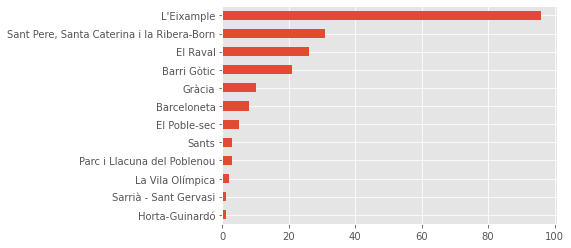

In [146]:
plt.style.use('ggplot')
resto_df['Neighbourhood'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

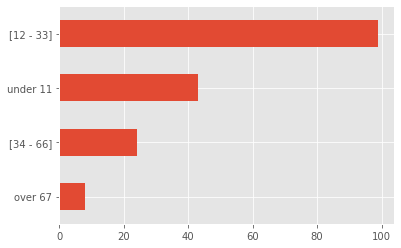

In [149]:
resto_df['Price range'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

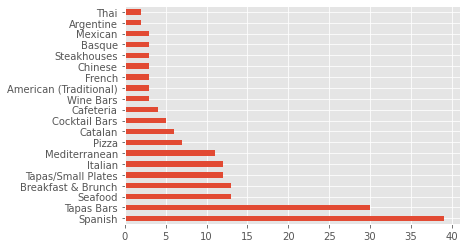

In [150]:
resto_df['Category'].value_counts().nlargest(20).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

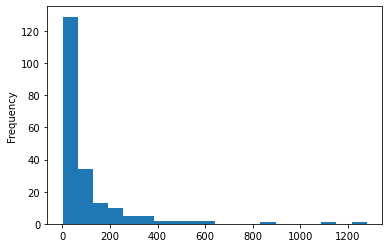

In [25]:
resto_df['Review count'].plot(kind='hist', bins=20)


Pubs

In [176]:
pub_soup = pd.read_csv('pub_soup.csv').drop(columns='Unnamed: 0').squeeze()
pub_soup2 = pd.read_csv('pub_soup2.csv').drop(columns='Unnamed: 0').squeeze()

#### Name
#### Name
name = []
for row in pub_soup:  # row contain 10 restaurants
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('.css-1egxyvc .css-1m051bw')
    for tag in result:
        # print(tag.text)
        name.append(tag.text)

name

['Scobies Irish Pub',
 'H1898 Rooftopbar',
 'L’Ovella Negra',
 'Bobby’s Free',
 'Madame George',
 'Nevermind',
 'The Michael Collins',
 'Bar Rubí',
 'Old Fashioned',
 'The Bollocks',
 'Biercab',
 'Flaherty’s',
 'Dow Jones',
 'El Bosc de les Fades',
 'Obama',
 'Tandem',
 'Hemingway',
 'Samba Brasil',
 'The George Payne',
 'Snooker',
 'Limerick',
 'Otto Zutz',
 'My Bar',
 'McCarthy’s',
 'Garage Beer Co',
 'Chill Bar',
 'JazzMan',
 'Polaroid',
 'George & Dragon',
 'La Cinemateca',
 'La Pepita',
 'London Bar',
 'Marsella',
 'The Black Horse',
 'The Philharmonic',
 'Elephanta',
 'La Birreria',
 'First Bar',
 'Hogan’s Australian Pub',
 'The Black Lion',
 'The Lime House',
 'Bonavida',
 'Dublin Sports',
 'Musical María',
 'Dunne’s Irish Bar',
 'Xixbar',
 'Gato Negro',
 'Lennox',
 'Le Standard',
 'Belushi’s',
 'Craft Barcelona',
 'Stoke Bar',
 'Fizz Barcelona',
 'Bloomsday Irish Pub',
 'Barna Brew',
 'Pippermint',
 'Obama Gastropub',
 'Oviso',
 'Touch Music Karaoke',
 'Sor Rita',
 'La Barrica'

In [164]:
#### Price range
#### Price range
price_range = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        price = header_text.select_one('.css-1s7bx9e')
        if price is not None:
            price_range.append(price.text)
        else:
            price_range.append(np.nan)

In [196]:
neighbourhood = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        neighboor = header_text.select_one('.css-dzq7l1 .css-chan6m')
        if neighboor is not None:
            neighbourhood.append(neighboor.text)
        else:
            neighbourhood.append(np.nan)



In [198]:
category = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        categor = header_text.select_one('.css-dd1rsv')
        if categor is not None:
            category.append(categor.text)
        else:
            category.append(np.nan)

In [165]:
#### Rating
#### Rating
rating = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rat = header_text.select_one('.overflow--hidden__09f24___ayzG')     
        if rat is not None:
            rating.append(rat['aria-label'].split()[0])

            # print(rat['aria-label'])
        else:
            rating.append(np.nan)
        

In [166]:
#### Reviews
reviews = []
container_class = 'container__09f24__mpR8_ hoverable__09f24__wQ_on margin-t3__09f24__riq4X margin-b3__09f24__l9v5d padding-t3__09f24__TMrIW padding-r3__09f24__eaF7p padding-b3__09f24__S8R2d padding-l3__09f24__IOjKY border--top__09f24__exYYb border--right__09f24__X7Tln border--bottom__09f24___mg5X border--left__09f24__DMOkM border-color--default__09f24__NPAKY'
for row in pub_soup:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.find_all(class_ = container_class)
    for tag in result:
        header_text = tag.div.div.div.nextSibling.div
        rev = header_text.select_one('.reviewCount__09f24__tnBk4')     
        if rev is not None:
            
            reviews.append(rev.text)
        else:
            reviews.append(np.nan)
        

In [167]:
#### Location

location = [] 
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select('address .raw__09f24__T4Ezm')
    adress_elements = []
    for tag in result:
        adress_elements.append(tag.text)
    location.append( '--'.join(adress_elements) )

In [168]:
#### Website
#### Website
website = []
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    result = soup.select_one('.css-na3oda+ .css-1p9ibgf .css-1um3nx')
    # for tag in result:
    if result is not None:
        website.append( result.text ) 

    else:
        website.append(np.nan)

In [223]:
#### Number of photos
#### Number of photos
nb_photos = []
photo_header_class = 'photo-header-content-container__09f24__jDLBB border-color--default__09f24__NPAKY'
for row in pub_soup2:
    soup = BeautifulSoup(row, 'html.parser')
    photo_header = soup.find(class_ = photo_header_class)
    if photo_header is not None:
        nb_photos.append(  pd.Series(photo_header.text).str.extract(r'See (\d+) photos').squeeze()  )
        # print('-'*100)
    else:
        nb_photos.append(np.nan)

nb_pub_df = pd.DataFrame({'name': pub_soup2.index, 'number_of_photos': nb_photos})


,name,number_of_photos
0,Scobies Irish Pub,17
1,H1898 Rooftopbar,14
2,L’Ovella Negra,50
3,Bobby’s Free,42
4,Madame George,35
...,...,...
227,El Ciclista,7
228,That’s the Way,12
229,Pipa,NaN
230,Sifó,5


In [170]:
#### Opening hours

opening_hours = {'name':list(), 'day':list(), 'opening':list(), 'closing':list()}
for row, name in zip(pub_soup2, pub_soup2.index):
    soup = BeautifulSoup(row, 'html.parser')
    days = []
    days_container = soup.select('.day-of-the-week__09f24__JJea_')
    time_container = soup.select('.no-wrap__09f24__c3plq.css-1p9ibgf')
    for day, time in zip(days_container, time_container):

        opening_hours['name'].append(name)
        opening_hours['day'].append(day.text)
        opening_hours['opening'].append(   pd.Series(time.text).str.extract(r'(\d+:\d+ \w+) - \d+:\d+ \w+').squeeze()   )
        opening_hours['closing'].append( pd.Series(time.text).str.extract(r'\d+:\d+ \w+ - (\d+:\d+ \w+)').squeeze() )

In [199]:
pub_df = pd.DataFrame({'name':name, 'rating':rating, 'category': category, 'neighbourhood': neighbourhood, 'reviews': reviews, 'price_range': price_range})

In [204]:

#### Amenities
#### Pub dataset
# Elements from first page


# Converting to EUR

# 1 EUR = 1.11234 USD
Euro = (pd.Series([10, 11, 30, 31, 60, 61]) * 1.11234).apply(lambda x: int(x))
mapper = {'€':'under 11', "€€":'[12 - 33]', '€€€':'[34 - 66]', '€€€€':'over 67'}

pub_df['price_range'] = pub_df['price_range'].map(mapper)

,name,rating,category,neighbourhood,reviews,price_range,street,postal_code
0,Scobies Irish Pub,4.5,Irish Pub,L'Eixample,26,under 11,"Carrer de Mallorca, 236",08008 Barcelona
1,H1898 Rooftopbar,4,Pubs,El Raval,7,[12 - 33],"Carrer Nou de la Rambla, 35",08001 Barcelona
2,L’Ovella Negra,4,Pubs,El Raval,78,under 11,"Rambla de Catalunya, 18",08007 Barcelona
3,Bobby’s Free,4.5,Pubs,L'Eixample,21,under 11,"Carrer de Montcada, 29",08003 Barcelona
4,Madame George,5,Lounges,Poblenou,4,under 11,"Carrer d'En Botella, 11",08007 Barcelona
...,...,...,...,...,...,...,...,...
136,Opera Samfaina,4,Pubs,El Raval,11,[12 - 33],"Carrer de la Diputació, 375",08013 Barcelona
137,Black Velvet,4,Lounges,El Poble-sec,1,[12 - 33],"Carrer de la Diputació, 269",08007 Barcelona
138,Thales,3.5,Dive Bars,Barri Gòtic,8,under 11,"Carrer del Consell de Cent, 339",08007 Barcelona
139,Homo Sibaris,4,Spanish,Sants,27,under 11,"Carrer de Tamarit, 142",08015 Barcelona


In [201]:
location_pub_df = pd.DataFrame({'name': pub_soup2.index, 'location': location})
# for n, loc in zip(hotel_soup2.index, location):
#     print(n,loc)
location_pub_df.location.str.split('::').apply(lambda x: len(x)).value_counts()
location_pub_df['street'] = location_resto_df.location.str.split('::').apply(lambda x: x[0])
location_pub_df['postal_code'] = location_resto_df.location.str.split('::').apply(lambda x: x[1] if len(x) == 3 else np.nan)
loc_pub_df = location_pub_df.drop(columns = 'location')
# loc_pub_df # final one


In [206]:
pub_df = pd.merge(pub_df, loc_pub_df)
pub_df.dropna(inplace=True)
pub_df.to_csv("pub_df_cleaned3.csv")


In [228]:
pub_df = pd.merge(pub_df, nb_pub_df)
